## Observations and Insights 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
import sklearn.datasets as dta

In [2]:
# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

In [3]:
# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

In [4]:
# Combine the data into a single dataset
mouse_data_complete_df = pd.merge(mouse_metadata,study_results, how="left", on=["Mouse ID"])
mouse_data_complete_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [5]:
mouse_data_combined = mouse_data_complete_df.groupby("Mouse ID")
mouse_data_combined.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1883,z969,Naftisol,Male,9,30,0,45.000000,0
1884,z969,Naftisol,Male,9,30,5,49.332999,0
1885,z969,Naftisol,Male,9,30,10,52.656081,1
1886,z969,Naftisol,Male,9,30,15,54.713005,2


In [6]:
mouse_data_complete_df.count()

Mouse ID              1893
Drug Regimen          1893
Sex                   1893
Age_months            1893
Weight (g)            1893
Timepoint             1893
Tumor Volume (mm3)    1893
Metastatic Sites      1893
dtype: int64

In [7]:
# Checking the number of mice.
total_mice = len(mouse_metadata["Mouse ID"].unique())
total_mice

249

In [8]:
timepoint = mouse_data_complete_df.set_index("Mouse ID")[["Timepoint"]]
timepoint.head()

,Timepoint
Mouse ID,
k403,0
k403,5
k403,10
k403,15
k403,20


In [9]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_rows = mouse_data_complete_df[mouse_data_complete_df.duplicated(["Mouse ID","Timepoint"])]
print(duplicate_rows)

    Mouse ID Drug Regimen     Sex  Age_months  Weight (g)  Timepoint  \
909     g989     Propriva  Female          21          26          0   
911     g989     Propriva  Female          21          26          5   
913     g989     Propriva  Female          21          26         10   
915     g989     Propriva  Female          21          26         15   
917     g989     Propriva  Female          21          26         20   

     Tumor Volume (mm3)  Metastatic Sites  
909           45.000000                 0  
911           47.570392                 0  
913           49.880528                 0  
915           53.442020                 0  
917           54.657650                 1  


In [10]:
# Optional: Get all the data for the duplicate mouse ID. 

duplicate_rows

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
909,g989,Propriva,Female,21,26,0,45.000000,0
911,g989,Propriva,Female,21,26,5,47.570392,0
913,g989,Propriva,Female,21,26,10,49.880528,0
915,g989,Propriva,Female,21,26,15,53.442020,0
917,g989,Propriva,Female,21,26,20,54.657650,1


In [11]:
clean_duplicate = mouse_data_complete_df[mouse_data_complete_df["Mouse ID"]!="g989"]
clean_duplicate["Mouse ID"].nunique()

248

## Summary Statistics

In [12]:
regimen_summary_df = clean_duplicate.groupby("Drug Regimen")
regimen_summary_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
10,s185,Capomulin,Female,3,17,0,45.000000,0
11,s185,Capomulin,Female,3,17,5,43.878496,0
12,s185,Capomulin,Female,3,17,10,37.614948,0
13,s185,Capomulin,Female,3,17,15,38.177232,0
14,s185,Capomulin,Female,3,17,20,36.866876,0


In [13]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
mean = (regimen_summary_df.mean()["Tumor Volume (mm3)"])
mean.head() 

Drug Regimen
Capomulin    40.675741
Ceftamin     52.591172
Infubinol    52.884795
Ketapril     55.235638
Naftisol     54.331565
Name: Tumor Volume (mm3), dtype: float64

In [14]:
median = (regimen_summary_df.median()["Tumor Volume (mm3)"])
median.head()

Drug Regimen
Capomulin    41.557809
Ceftamin     51.776157
Infubinol    51.820584
Ketapril     53.698743
Naftisol     52.509285
Name: Tumor Volume (mm3), dtype: float64

In [15]:
variance = (regimen_summary_df.var()["Tumor Volume (mm3)"])
variance.head()

Drug Regimen
Capomulin    24.947764
Ceftamin     39.290177
Infubinol    43.128684
Ketapril     68.553577
Naftisol     66.173479
Name: Tumor Volume (mm3), dtype: float64

In [16]:
standard_deviation = (regimen_summary_df.std()["Tumor Volume (mm3)"])
standard_deviation.head()

Drug Regimen
Capomulin    4.994774
Ceftamin     6.268188
Infubinol    6.567243
Ketapril     8.279709
Naftisol     8.134708
Name: Tumor Volume (mm3), dtype: float64

In [17]:
sem = (regimen_summary_df.sem()["Tumor Volume (mm3)"])
sem.head()

Drug Regimen
Capomulin    0.329346
Ceftamin     0.469821
Infubinol    0.492236
Ketapril     0.603860
Naftisol     0.596466
Name: Tumor Volume (mm3), dtype: float64

In [18]:
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary dataframe.
tumor_volume_summary = pd.DataFrame({"Mean": mean,
                             "Median" : median,
                               "Variance": variance,
                               "Standard Deviation" : standard_deviation,
                               "SEM" : sem})
tumor_volume_summary


,Mean,Median,Variance,Standard Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [19]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line
clean_duplicate.groupby("Drug Regimen").agg({"Tumor Volume (mm3)": ["mean", "median", "var", "std", "sem"]})

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

In [20]:
# sum = regimen_summary_df.loc[regimen_summary_df.sum()["Timepoint"].groupby("Drug Regimen")
# sum.sum()

In [21]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.

sum_mouse = (clean_duplicate.groupby("Drug Regimen").count()["Timepoint"])
sum_mouse.head(20) 

Drug Regimen
Capomulin    230
Ceftamin     178
Infubinol    178
Ketapril     188
Naftisol     186
Placebo      181
Propriva     148
Ramicane     228
Stelasyn     181
Zoniferol    182
Name: Timepoint, dtype: int64

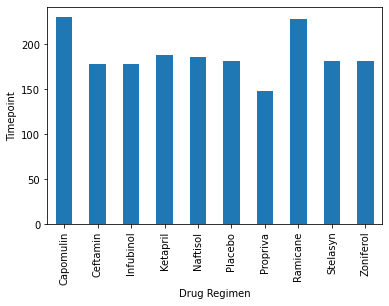

In [32]:
sum_mouse.plot.bar()
plt.ylabel("Timepoint")
plt.savefig("Image/TotalTimepoints.png")
plt.show()

In [31]:
!mkdir Image

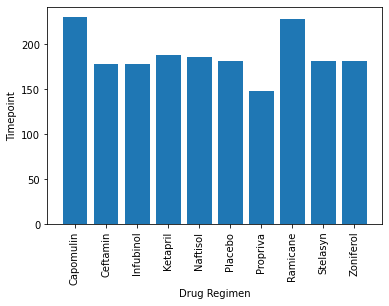

In [33]:
plt.bar(sum_mouse.index, sum_mouse.values)
plt.xticks(rotation = 90)
plt.xlabel("Drug Regimen")
plt.ylabel("Timepoint")
plt.savefig("Image/TotalTimepoints_plt.png")
plt.show()

In [34]:
sum_mouse.values

array([230, 178, 178, 188, 186, 181, 148, 228, 181, 182])

In [26]:
sum_mouse.index

Index(['Capomulin', 'Ceftamin', 'Infubinol', 'Ketapril', 'Naftisol', 'Placebo',
       'Propriva', 'Ramicane', 'Stelasyn', 'Zoniferol'],
      dtype='object', name='Drug Regimen')

In [39]:
mouse_female = clean_duplicate.groupby("Sex")["Mouse ID"].count()
mouse_female

Sex
Female    922
Male      958
Name: Mouse ID, dtype: int64

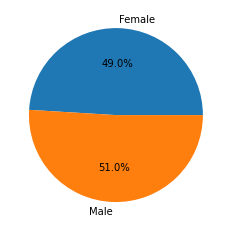

In [40]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
plt.pie(mouse_female.values,labels=mouse_female.index, autopct="%1.1f%%" )
plt.savefig("Image/pypies.png")
plt.show()

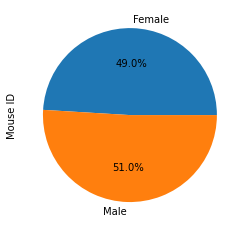

In [42]:
mouse_female.plot.pie(autopct="%1.1f%%")
plt.savefig("Image/TotalTimepoints_plt.png")
plt.show()

## Quartiles, Outliers and Boxplots

In [48]:
regimen_summary_df = mouse_data_complete_df.groupby("Drug Regimen")
regimen_summary_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
10,s185,Capomulin,Female,3,17,0,45.000000,0
11,s185,Capomulin,Female,3,17,5,43.878496,0
12,s185,Capomulin,Female,3,17,10,37.614948,0
13,s185,Capomulin,Female,3,17,15,38.177232,0
14,s185,Capomulin,Female,3,17,20,36.866876,0


In [208]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
# Start by getting the last (greatest) timepoint for each mouse
most_recent_mice = clean_duplicate.groupby("Mouse ID")["Timepoint"].max().reset_index()

In [222]:
# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
most_recent_full = most_recent_mice.merge(clean_duplicate, how="inner", on=["Mouse ID", "Timepoint"])
most_recent_full

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,a203,45,Infubinol,Female,20,23,67.973419,2
1,a251,45,Infubinol,Female,21,25,65.525743,1
2,a262,45,Placebo,Female,17,29,70.717621,4
3,a275,45,Ceftamin,Female,20,28,62.999356,3
4,a366,30,Stelasyn,Female,16,29,63.440686,1
...,...,...,...,...,...,...,...,...
243,z435,10,Propriva,Female,12,26,48.710661,0
244,z578,45,Ramicane,Male,11,16,30.638696,0
245,z581,45,Infubinol,Female,24,25,62.754451,3
246,z795,45,Naftisol,Female,13,29,65.741070,3


In [224]:
# Put treatments into a list for for loop (and later for plot labels)
treatment_list = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

In [225]:
# Create empty list to fill with tumor vol data (for plotting)
empty_list = []    
# print("Values of empty_list:", empty_list)
# print("Type of empty_list:", type(empty_list))
# print("Size of empty_list:", len(empty_list))  

In [226]:
# Calculate the IQR and quantitatively determine if there are any potential outliers. 
for drug in treatment_list:
    # Locate the rows which contain mice on each drug and get the tumor volumes
    drug_list = most_recent_full.loc[most_recent_full["Drug Regimen"] == drug, "Tumor Volume (mm3)" ]
    drug_list
    
    
    # add subset 
    empty_list.append(drug_list)
    
    # Determine outliers using upper and lower bounds
    quartiles = drug_list.quantile([.25, .5, .75])
    lower_q = quartiles[0.25]
    upper_q = quartiles[0.75]
    
    iqr = upper_q - lower_q
    
    lower_bound = lower_q - (1.5*iqr)
    upper_bound = upper_q + (1.5*iqr)
    
    outliers = drug_list.loc[(drug_list < lower_bound) | (drug_list > upper_bound)]
    print(outliers)

Series([], Name: Tumor Volume (mm3), dtype: float64)
Series([], Name: Tumor Volume (mm3), dtype: float64)
31    36.321346
Name: Tumor Volume (mm3), dtype: float64
Series([], Name: Tumor Volume (mm3), dtype: float64)


In [227]:
empty_list

[19     38.982878
 24     38.939633
 61     30.485985
 64     37.074024
 66     40.159220
 80     47.685963
 83     37.311846
 85     38.125164
 87     38.753265
 108    41.483008
 115    38.846876
 121    28.430964
 124    33.329098
 162    46.539206
 163    32.377357
 169    41.581521
 174    23.343598
 180    40.728578
 183    34.455298
 192    31.023923
 204    40.658124
 208    39.952347
 220    36.041047
 226    28.484033
 239    31.896238
 Name: Tumor Volume (mm3), dtype: float64,
 6      38.407618
 7      43.047543
 10     38.810366
 12     32.978522
 33     38.342008
 37     33.397653
 45     37.311236
 52     40.659006
 70     29.128472
 76     33.562402
 77     36.374510
 91     31.560470
 93     36.134852
 96     22.050126
 119    30.564625
 126    31.095335
 157    45.220869
 158    36.561652
 166    37.225650
 168    43.419381
 177    30.276232
 190    40.667713
 217    43.166373
 235    44.183451
 244    30.638696
 Name: Tumor Volume (mm3), dtype: float64,
 0      67.973

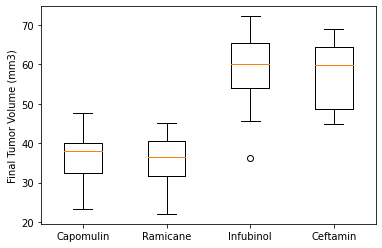

In [228]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
plt.boxplot(empty_list, labels = treatment_list)
plt.ylabel('Final Tumor Volume (mm3)')
plt.show()

## Line and Scatter Plots

In [221]:
mouse_capomulin  = clean_duplicate.loc[(clean_duplicate["Drug Regimen"] == 'Capomulin')]
mouse_capomulin.head(30) 

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
10,s185,Capomulin,Female,3,17,0,45.000000,0
11,s185,Capomulin,Female,3,17,5,43.878496,0
12,s185,Capomulin,Female,3,17,10,37.614948,0
13,s185,Capomulin,Female,3,17,15,38.177232,0
14,s185,Capomulin,Female,3,17,20,36.866876,0
15,s185,Capomulin,Female,3,17,25,33.949940,0
16,s185,Capomulin,Female,3,17,30,32.959671,1
17,s185,Capomulin,Female,3,17,35,28.328531,1
18,s185,Capomulin,Female,3,17,40,25.472143,1
19,s185,Capomulin,Female,3,17,45,23.343598,1


In [236]:
mouse_capomulin_s185  = mouse_capomulin.loc[(clean_duplicate["Mouse ID"] == 's185')]
mouse_capomulin_s185 

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
10,s185,Capomulin,Female,3,17,0,45.000000,0
11,s185,Capomulin,Female,3,17,5,43.878496,0
12,s185,Capomulin,Female,3,17,10,37.614948,0
13,s185,Capomulin,Female,3,17,15,38.177232,0
14,s185,Capomulin,Female,3,17,20,36.866876,0
15,s185,Capomulin,Female,3,17,25,33.949940,0
16,s185,Capomulin,Female,3,17,30,32.959671,1
17,s185,Capomulin,Female,3,17,35,28.328531,1
18,s185,Capomulin,Female,3,17,40,25.472143,1
19,s185,Capomulin,Female,3,17,45,23.343598,1


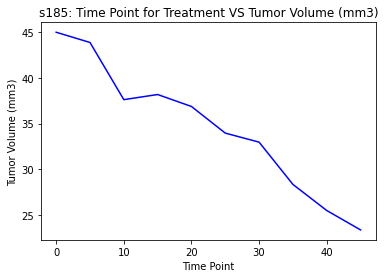

In [252]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
capomulin_s185 = plt.plot(mouse_capomulin_s185['Timepoint'], mouse_capomulin_s185['Tumor Volume (mm3)'], color="blue")
plt.xlabel("Time Point")
plt.ylabel("Tumor Volume (mm3)")
plt.title("s185: Time Point for Treatment VS Tumor Volume (mm3)")
plt.show()

In [253]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
average_tumor_capomulin = mouse_capomulin.groupby("Mouse ID").mean()
average_tumor_capomulin

,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
Mouse ID,,,,,
b128,9.0,22.0,22.5,41.963636,0.70
b742,7.0,21.0,22.5,40.083699,0.00
f966,16.0,17.0,10.0,36.505973,0.00
g288,3.0,19.0,22.5,41.990097,0.80
g316,22.0,22.0,22.5,44.613344,1.00
i557,1.0,24.0,22.5,44.805810,0.20
i738,23.0,20.0,22.5,39.141053,0.60
j119,7.0,23.0,22.5,44.465236,0.60
j246,21.0,21.0,17.5,43.216925,0.25


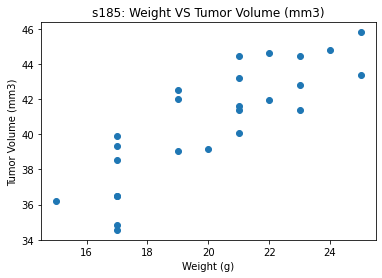

In [256]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
plt.scatter(average_tumor_capomulin["Weight (g)"], average_tumor_capomulin["Tumor Volume (mm3)"])
plt.xlabel('Weight (g)')
plt.ylabel('Tumor Volume (mm3)')
plt.title('s185: Weight VS Tumor Volume (mm3)')
plt.show()

## Correlation and Regression

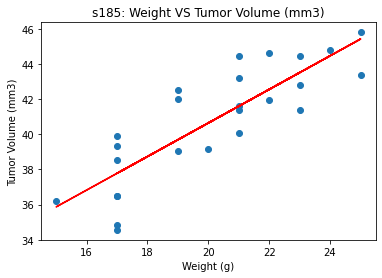

In [255]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimencorr = round(st.pearsonr(average_tumor_capomulin["Weight (g)"], average_tumor_capomulin["Tumor Volume (mm3)"])[0],2)
model = st.linregress(average_tumor_capomulin["Weight (g)"], average_tumor_capomulin["Tumor Volume (mm3)"])
y_values = average_tumor_capomulin["Weight (g)"]*model[0] + model[1]
plt.scatter(average_tumor_capomulin["Weight (g)"], average_tumor_capomulin["Tumor Volume (mm3)"])
plt.plot(average_tumor_capomulin["Weight (g)"], y_values, color="r")        
plt.xlabel("Weight (g)")
plt.ylabel("Tumor Volume (mm3)")
plt.title("s185: Weight VS Tumor Volume (mm3)")
plt.show()